In [ ]:
# Install dependencies
!pip install scikit-learn folium seaborn matplotlib

In [ ]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import folium
from folium.plugins import MarkerCluster, HeatMap

In [10]:
df = pd.read_csv("cleaned_earthquake_data.csv")

# Drop missing rows
df = df.dropna(subset=['Latitude', 'Longitude', 'Magnitude', 'Depth'])

# Convert timestamp
df['Time'] = pd.to_datetime(df['Time'], unit='ms', errors='coerce')

# Drop duplicates and invalid magnitudes
df = df.drop_duplicates()
df = df[df['Magnitude'] > 0]

# Normalize Latitude, Longitude, Depth
scaler = MinMaxScaler()
df[['Latitude', 'Longitude', 'Depth']] = scaler.fit_transform(df[['Latitude', 'Longitude', 'Depth']])

print(f" Cleaned dataset: {len(df)} records")
print(df.describe()[['Latitude','Longitude','Depth','Magnitude']])

 Cleaned dataset: 1000 records
          Latitude    Longitude        Depth    Magnitude
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.536876     0.683819     0.113704     4.668120
min       0.000000     0.000000     0.000000     4.000000
25%       0.399297     0.416076     0.007599     4.400000
50%       0.507242     0.851963     0.045592     4.600000
75%       0.739170     0.912530     0.119182     4.900000
max       1.000000     1.000000     1.000000     7.600000
std       0.230279     0.304926     0.192689     0.450062


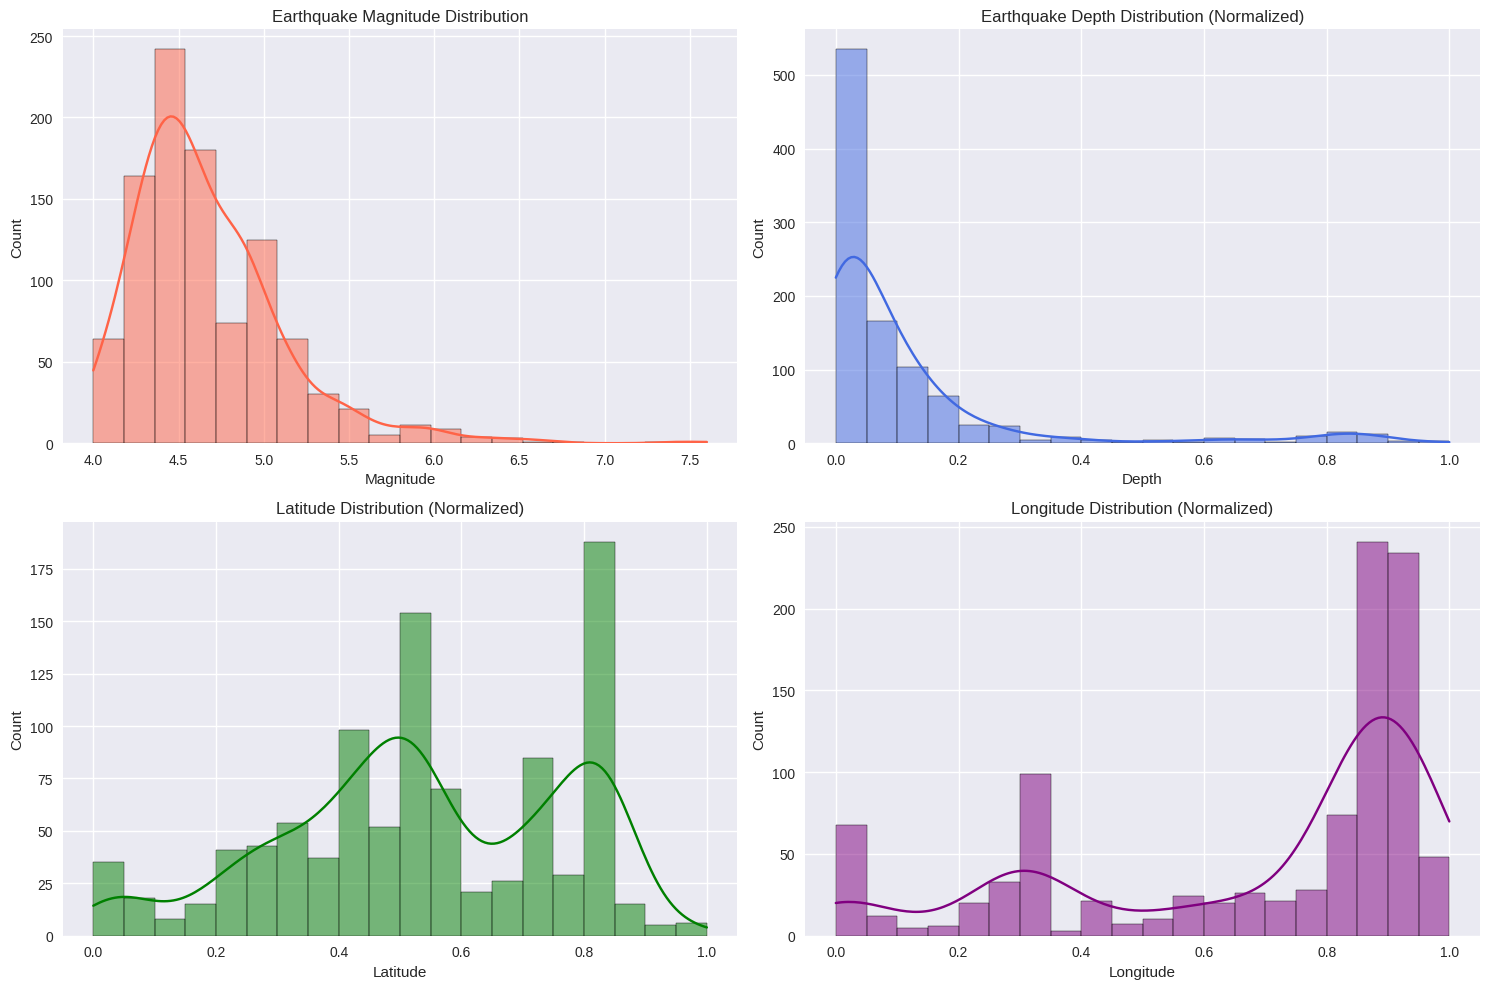

In [11]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15, 10))

# Histogram of magnitudes
plt.subplot(2, 2, 1)
sns.histplot(df['Magnitude'], bins=20, kde=True, color='tomato')
plt.title("Earthquake Magnitude Distribution")

# Depth distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Depth'], bins=20, kde=True, color='royalblue')
plt.title("Earthquake Depth Distribution (Normalized)")

# Latitude distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], bins=20, kde=True, color='green')
plt.title("Latitude Distribution (Normalized)")

# Longitude distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], bins=20, kde=True, color='purple')
plt.title("Longitude Distribution (Normalized)")

plt.tight_layout()
plt.show()

In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(world_map)

# Add circle markers
for _, row in df.iterrows():
    popup_info = f"Mag: {row['Magnitude']:.2f} | Lat: {row['Latitude']:.2f}, Lon: {row['Longitude']:.2f}"
    folium.CircleMarker(
        location=[row['Latitude'] * 180 - 90, row['Longitude'] * 360 - 180],  # rescale normalized coords
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=popup_info
    ).add_to(marker_cluster)

# Add HeatMap layer
heat_data = [[row['Latitude'] * 180 - 90, row['Longitude'] * 360 - 180, row['Magnitude']] for _, row in df.iterrows()]
HeatMap(heat_data, radius=10, blur=8).add_to(world_map)

# Display map inline in Google Colab
world_map

In [9]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap

def visualize_earthquakes():
    df = pd.read_csv("cleaned_earthquake_data.csv").dropna(subset=["Latitude", "Longitude"])

    world_map = folium.Map(location=[0, 0], zoom_start=2)
    marker_cluster = MarkerCluster().add_to(world_map)

    for _, row in df.iterrows():
        popup_info = f"Mag: {row['Magnitude']} | Location: {row['Latitude']}, {row['Longitude']}"
        folium.CircleMarker(
            location=[row["Latitude"], row["Longitude"]],
            radius=5,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6,
            popup=popup_info
        ).add_to(marker_cluster)

    heat_data = [[row["Latitude"], row["Longitude"], row["Magnitude"]] for _, row in df.iterrows()]
    HeatMap(heat_data).add_to(world_map)

    world_map.save("earthquake_map.html")
    print(" Map saved as 'earthquake_map.html'.")

if __name__ == "__main__":
    visualize_earthquakes()

 Map saved as 'earthquake_map.html'.
